In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
data = pd.read_csv('resp1.csv', delimiter='@')
data.head()

,gender,SITEID,SUBJID,TRTPN,responseCategory
0,MALE,1,27,2,SD
1,FEMALE,1,39,1,PD
2,MALE,1,126,2,PD
3,MALE,1,154,1,SD
4,FEMALE,1,161,1,PD


In [3]:
data.isna().sum().sort_values(ascending=False)

gender              0
SITEID              0
SUBJID              0
TRTPN               0
responseCategory    0
dtype: int64

In [4]:
print(data['gender'].unique())
print(data['TRTPN'].unique())
print(data['responseCategory'].unique())

['MALE' 'FEMALE']
[2 1]
['SD' 'PD' 'NE' 'PR' 'CR']


In [5]:
data['response_encode'] = data['responseCategory'].map({'CR' : 1, 'PR' : 1, 'SD' : 0, 'PD' : 0, 'NE' : 0})

<AxesSubplot:xlabel='response_encode', ylabel='Count'>

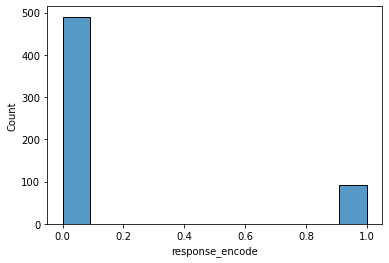

In [6]:
sns.histplot(data=data, x="response_encode")

In [7]:
data['gender_encode'] = data['gender'].map({'MALE' : 1, 'FEMALE' : 0})

<AxesSubplot:xlabel='gender_encode', ylabel='Count'>

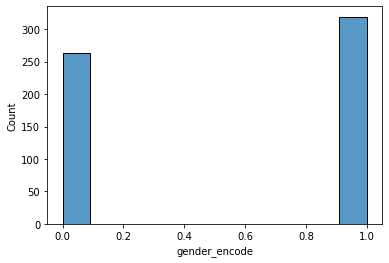

In [8]:
sns.histplot(data=data, x="gender_encode")

In [9]:
data.head()

,gender,SITEID,SUBJID,TRTPN,responseCategory,response_encode,gender_encode
0,MALE,1,27,2,SD,0,1
1,FEMALE,1,39,1,PD,0,0
2,MALE,1,126,2,PD,0,1
3,MALE,1,154,1,SD,0,1
4,FEMALE,1,161,1,PD,0,0


## MODEL 1

In [10]:
y = data['response_encode'].to_numpy()
treatment = pd.get_dummies(data['TRTPN'])
treatment1 = sm.add_constant(treatment[1])

In [11]:
treatment1

,const,1
0,1.0,0
1,1.0,1
2,1.0,0
3,1.0,1
4,1.0,1
...,...,...
577,1.0,0
578,1.0,0
579,1.0,0
580,1.0,0


In [12]:
model = sm.Logit(y, treatment1)

In [13]:
result = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.432137
         Iterations 6


In [14]:
result.params

const   -1.953815
1        0.515335
dtype: float64

In [15]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: 0.010   
Dependent Variable: y                AIC:              507.0080
Date:               2022-02-13 13:48 BIC:              515.7409
No. Observations:   582              Log-Likelihood:   -251.50 
Df Model:           1                LL-Null:          -254.02 
Df Residuals:       580              LLR p-value:      0.024808
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     6.0000                                     
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
const      -1.9538    0.1781  -10.9712  0.0000  -2.3029  -1.6048
1           0.5153    0.2320    2.2216  0.0263   0.0607   0.9700
===============================================================

"""

In [31]:
name_tr1_tr2 = 'ODDS RATIO (95% CI): Treatment 1 VS Treatment 2'
odds_ratio_tr1_tr2 = round(np.exp(0.5153), 2)
CI_tr1_tr2_2 = round(np.exp(0.5153+1.96*0.2320), 2)
CI_tr1_tr2_1 = round(np.exp(0.5153-1.96*0.2320), 2)

In [17]:
# another way of calculating it
model_odds = pd.DataFrame(np.exp(result.params), columns=['Odds Ratio'])
model_odds

,Odds Ratio
const,0.141732
1,1.674200


#### QUESTIONS:

Create logistic regression model with Response (responder / non-responder binomial variable, where response is an event) as dependent variable and Intercept and Treatment as independent variables.

1. Report an odds ratio derived from this model of treatment 1 over treatment 2.
2. Give a definition of Odds Ratio.
3. Give definition of confidence interval
4. How it is related with regression coefficients estimated in this model?

#### ANSWERS:

1. See above. 
2. Odds ratio - measure of assciation between an exposure and an outcome. Represents the constant effect of predictor X on the likelihood that positive outcome will occur. It is calculated as the probability that the ever occurs divided by the probability that the event does not occur.
3. Confidence interval - statistic that shows the range of true odds ratio for population. It is used to estimate the precision of the odds ration. For example, with 95% confidence interval, you can be 95% confident that it contains the true value of the odds ratio. A large CI indicates a low level of precision, whereas a small CI indicates a highe precision of the OR.
4. Derived from the model the odds of getting a success using treatment 1 is 1.67. This can be interpreted as follows: the subjects who received treatment 1 had a positive response 1.67 times more than subjects treated with treatment 2. Confidence values are not widely different, so we can be quite sure in our assessment. We can also be sure that true value of odds ratio falls in between 1.06 and 2.64, so treatment 1 is with 95% confidence better than treatment 2.

## MODEL 2

In [18]:
treatment = pd.get_dummies(data['TRTPN'])
treatment1 = treatment[1]
gender = pd.get_dummies(data['gender'])
genderfemale = gender['FEMALE']

In [19]:
treatment1

0      0
1      1
2      0
3      1
4      1
      ..
577    0
578    0
579    0
580    0
581    1
Name: 1, Length: 582, dtype: uint8

In [20]:
model_2 = smf.logit(formula='y ~ treatment1 + genderfemale + treatment1*genderfemale', data=data).fit()

Optimization terminated successfully.
         Current function value: 0.431351
         Iterations 6


In [21]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  582
Model:                          Logit   Df Residuals:                      578
Method:                           MLE   Df Model:                            3
Date:                Sun, 13 Feb 2022   Pseudo R-squ.:                 0.01172
Time:                        13:50:03   Log-Likelihood:                -251.05
converged:                       True   LL-Null:                       -254.02
Covariance Type:            nonrobust   LLR p-value:                    0.1139
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -2.0015      0.238     -8.401      0.000      -2.468      -1.535
treatment1                  0.6881      0.310      2.216      0.027       0.080       1.297
genderfemale                0.1106      0.359      0.308      0.758      -0.592       0.814
treatment1:genderfemale    -0.3814      0.468     -0.816      0.415      -1.298       0.535
===========================================================================================
"""

In [22]:
name_1 = 'ODDS RATIO (95% CI): Treatment 1 VS. Treatment 2 | Female'
coef_1 = (0.6881 - 0.3814)
error_1 = np.sqrt((0.310*0.310)+(0.468*0.468))
odds_ratio_1 = round(np.exp(coef_1), 2)
CI_1_1 = round(np.exp(coef_1+1.96*error_1), 2)
CI_1_2 = round(np.exp(coef_1-1.96*error_1), 2)

In [27]:
name_2 = 'ODDS RATIO (95% CI): Treatment 1 VS. Treatment 2 | Male'
coef_2 = 0.6881
odds_ratio_2 = round(np.exp(coef_2), 2)
CI_2_1 = round(np.exp(coef_2+1.96*0.310), 2)
CI_2_2 = round(np.exp(coef_2-1.96*0.310), 2)

In [23]:
name_3 = 'ODDS RATIO (95% CI): Female VS. Male | Treatment 1'
coef_3 = (0.1106 - 0.3814)
error_3 = np.sqrt((0.359*0.359)+(0.468*0.468))
odds_ratio_3 = round(np.exp(coef_3), 2)
CI_3_1 = round(np.exp(coef_3+1.96*error_3), 2)
CI_3_2 = round(np.exp(coef_3-1.96*error_3), 2)

In [24]:
name_4 = 'ODDS RATIO (95% CI): Female VS. Male | Treatment 2'
coef_4 = 0.1106
odds_ratio_4 = round(np.exp(coef_4), 2)
CI_4_1 = round(np.exp(coef_4+1.96*0.359), 2)
CI_4_2 = round(np.exp(coef_4-1.96*0.359), 2)

In [32]:
response_data = {'Task':[name_tr1_tr2, name_1, name_2, name_3, name_4, 'Interaction P-value'], 'Response rate': [[odds_ratio_tr1_tr2, '({0}, {1})'.format(CI_tr1_tr2_1, CI_tr1_tr2_2)],
                                                                                          [odds_ratio_1,'({0}, {1})'.format(CI_1_2, CI_1_1)], [odds_ratio_2, '({0}, {1})'.format(CI_2_2, CI_2_1)], 
                                                                                          [odds_ratio_3, '({0}, {1})'.format(CI_3_2, CI_3_1)], [odds_ratio_4, '({0}, {1})'.format(CI_4_2, CI_4_1)], 0.415]}
response_table = pd.DataFrame.from_dict(response_data)
response_table

,Task,Response rate
0,ODDS RATIO (95% CI): Treatment 1 VS Treatment 2,"[1.67, (1.06, 2.64)]"
1,ODDS RATIO (95% CI): Treatment 1 VS. Treatment...,"[1.36, (0.45, 4.08)]"
2,ODDS RATIO (95% CI): Treatment 1 VS. Treatment...,"[1.99, (1.08, 3.65)]"
3,ODDS RATIO (95% CI): Female VS. Male | Treatme...,"[0.76, (0.24, 2.42)]"
4,ODDS RATIO (95% CI): Female VS. Male | Treatme...,"[1.12, (0.55, 2.26)]"
5,Interaction P-value,0.415


#### QUESTIONS:
Create logistic regression model with Response (responder / non-responder binomial variable, where response is an event) as dependent variable and Intercept, Treatment, Gender and Treatment*Gender (interaction of Treatment and Gender) as independent variables.

1. Report an 4 conditional odds ratio derived from this model:
- treatment 1 vs treatment 2 | Male
- treatment 1 vs treatment 2 | Female
- Female vs Male | treatment 1
- Female vs Male | treatment 2.
2. How these 4 odds ratio are related to estimated coefficients?
- Report pvalue for interaction (of Treatment*Gender) significance.
- Give definition of the pvalue.
3. Based on this pvalue – do we need to update model (simplify it)? Why?

#### ANSWERS:
1. Derived from the model the odds are as follows:
<ul>
    <li> Treatment 1 vs Treatment 2 | Female: The odds of getting a success using treatment 1 over treatment 2 in female subjects is 1.36. Confidence interval values vary quite a lot though and they also drop below 1.0, so I think precision of this odds ratio is low, meaning we have to be careful whether we make decisions based on it.</li>
    <li> Treatment 1 vs Treatment 2 | Male: The odds of getting a success using treatment 1 over treatment 2 in males subjects is 1.99. This means that male subjects who received treatment 1 had a positive response 1.99 times more than subjects treated with treatment 2. Confidence interval values vary, but not much, so we can be pretty sure with our assessment.</li>
    <li> Female vs Male | Treatment 1: The odds of getting a success using treatment 1 in female subjects over male subjects is 0.76. This means that treatment 1 is more effective in male subjects than in female subjects. Confidence interval values vary quite a lot though, so I think precision of this odds ratio is low, meaning we have to be careful whether we make decisions based on it.</li>
    <li> Female vs Male | Treatment 2: The odds of getting a success using treatment 2 in female subjects over male subjects is 1.12. Treatment 2 is more successful in female subjects, however, confidence intervals vary.</li>
</ul>
Overall, it can be said that:
<ul>
    <li> Treatment 1 has higher positive response rates than treatment 2 without gender variable involved. </li>
    <li> Male subjects respond better to treatment 1 than treatment 2. </li>
    <li> Female subjects respond better to treatment 1 than treatment 2, however, since lower confidence interval is below 1, I would suggest testing treatments on female subjects more. </li>
    <li> Male subjects respond better to treatment 1 than female subjects. </li>
    <li> Female subjects respond better to treatment 2 than male subjects. </li>
    <li> However, confidence intervals are wide for last two points, so those conclusions must be tested more. </li>
</ul>
2. Pvalue for interaction significance is 0.415.
Pvalue - measure of probability that observed data could have occured just by random chance. Pvalue of <0.05 means that there is only 5% chance that data on which model is based could have occured under null hypothesis (there is no significant relationship between dependant and independant variables, no correlation = random occurence), thus pvalue <0.05 means that we reject H0.
3. Based on pvale for interaction significance we need to update the model: simplify it by removing the interaction, since it does not significantly effect our predicted value (response).